In [154]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from save_measures import Run
from precomputation import RunPair
from config import ExperimentType

In [155]:
params = ["lr", "batch_norm", "batch_size", "model_depth", "dropout_prob"]

In [238]:
with open("./data.nosync/pre-comp-correlations/pac_bayes-best.pickle", "rb") as f:
    pair_corrs = pickle.load(f)

In [239]:
def overall_correlations(pair_corrs):
    def extract_corrs(name):
        corr_dict = pair_corrs[name]
        corrs = {}

        for hp_pair, steps_dict in corr_dict.items():
            if hp_pair[0][1] != ExperimentType.NO_DROPOUT or hp_pair[1][1] != ExperimentType.NO_DROPOUT:
                continue
            
            for step, (measures_dict, num_runs) in steps_dict.items():
                step_corrs = corrs.get(step, {})

                for measure, corr in measures_dict.items():
                    step_measure_corrs = step_corrs.get(measure, [])
                    step_measure_corrs.append((corr, num_runs))
                    step_corrs[measure] = step_measure_corrs
                    
                corrs[step] = step_corrs
        
        return corrs
    
    weighted_corrs = extract_corrs("weighted")
    unweighted_corrs = extract_corrs("unweighted")
    
    return {"weighted": weighted_corrs, "unweighted": unweighted_corrs}

In [240]:
def differ_in_only(config_pair, hp):
    i = params.index(hp)

    truth = True
    for j in range(len(params)):
        if j == i:
            continue
        truth = truth and config_pair[0][0][j] == config_pair[1][0][j]

    return truth


def hp_correlation(pair_corrs, hp):
    def extract_corrs(name):
        corr_dict = pair_corrs[name]
        corrs = {}

        for hp_pair, steps_dict in corr_dict.items():
            if (hp != "batch_norm" and (hp_pair[0][1] == ExperimentType.BATCH_NORM or \
                                        hp_pair[1][1] == ExperimentType.BATCH_NORM)) \
            or (hp == "batch_norm" and (hp_pair[0][1] != ExperimentType.BATCH_NORM or \
                                        hp_pair[1][1] != ExperimentType.BATCH_NORM)) \
            or not differ_in_only(hp_pair, hp):
                continue

            for step, (measures_dict, num_runs) in steps_dict.items():
                step_corrs = corrs.get(step, {})

                for measure, corr in measures_dict.items():
                    step_measure_corrs = step_corrs.get(measure, [])
                    step_measure_corrs.append((corr, num_runs))
                    step_corrs[measure] = step_measure_corrs

                corrs[step] = step_corrs

        return corrs

    weighted_corrs = extract_corrs("weighted")
    unweighted_corrs = extract_corrs("unweighted")

    return {"weighted": weighted_corrs, "unweighted": unweighted_corrs}

In [241]:
overall_corrs = hp_correlation(pair_corrs, "model_depth")

In [242]:
overall_corrs["weighted"].keys()

dict_keys([1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840, 845, 850, 855, 860, 865, 870, 875, 880, 885, 890, 895, 900, 905, 910, 915, 920, 925, 930, 935, 940, 945, 950, 955, 960, 965, 970, 975, 980, 985, 990, 995, 1000, 0.0, 

In [243]:
def correlation_envelope(correlations, measure, steps):
    x = steps
    # mean
    y = [np.mean([x[0] for x in correlations[s][measure]]) for s in steps]
    # median
#     y = [np.median([x[0] for x in correlations[s][measure]]) for s in steps]
#     upper = [np.percentile([x[0] for x in correlations[s][measure]], 25) for s in steps]
#     lower = [np.percentile([x[0] for x in correlations[s][measure]], 75) for s in steps]

    plt.plot(x, y, "k-")
    plt.title(measure)
#     plt.fill_between(x, lower, upper)
    plt.show()

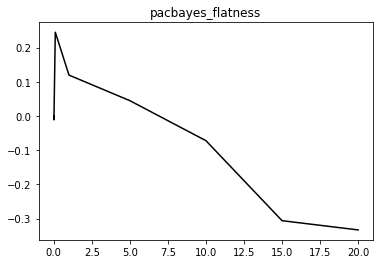

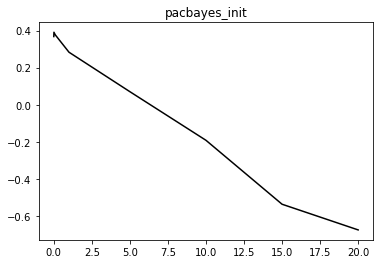

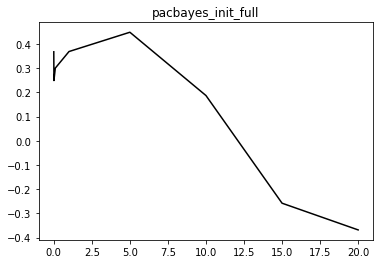

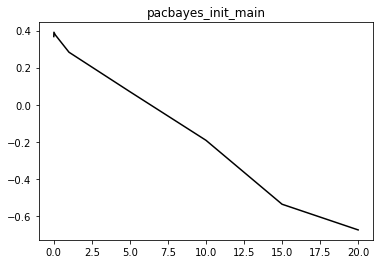

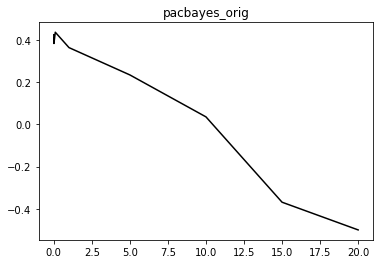

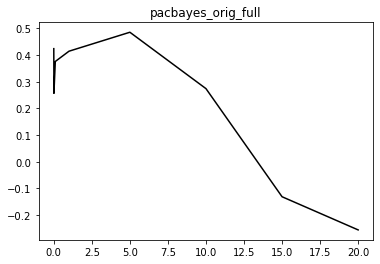

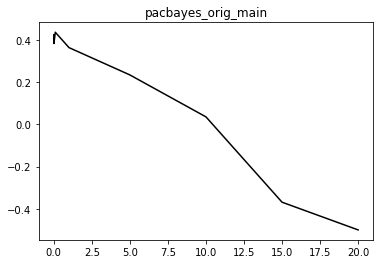

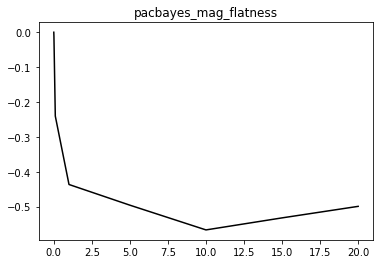

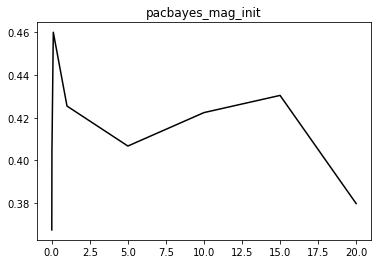

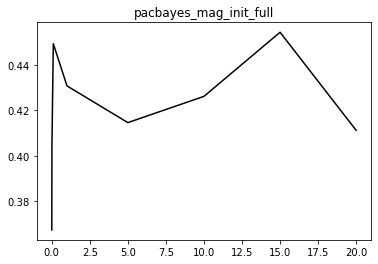

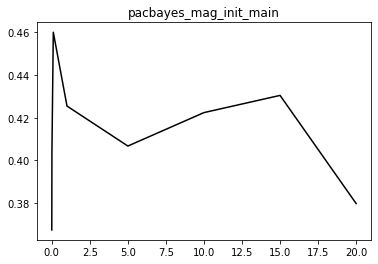

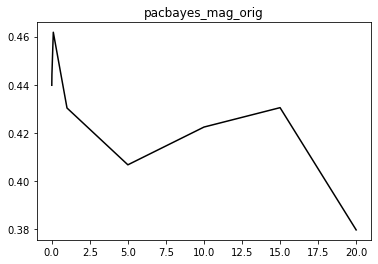

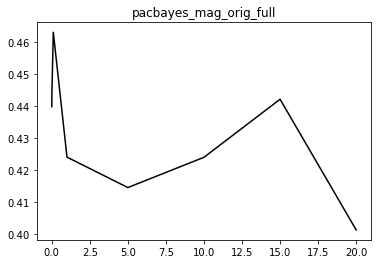

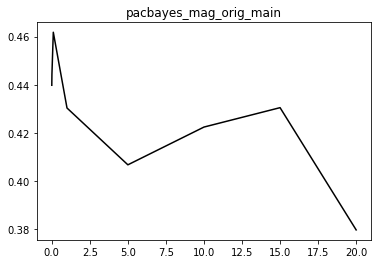

In [244]:
for k in overall_corrs["weighted"][0.001].keys():
    correlation_envelope(overall_corrs["weighted"], k, (0.001, 0.01, 0.1, 1, 5, 10, 15, 20))